# 数据可视化——使用 seaborn 绘制统计图形


本章介绍使用 `seaborn` 库进行统计绘图。在数据分析中，可视化不是辅助，而是核心环节。通过图形，可以直观地发现数据规律、验证假设、呈现分析结果。

本章将直接从需求出发，讲解如何通过代码将数据转化为图形。内容组织从单个变量的探索开始，逐步过渡到多个变量间关系的分析，最后覆盖多图组合与高级定制的技巧。

本章包含以下内容：

* 单变量分布图
  * 直方图 (histplot): 查看连续变量的分布形态。
  * 计数图 (countplot): 统计分类变量的频次。
* 关系与比较图
  * 柱状图 (barplot): 比较不同类别的数值统计量（如均值）。
  * 折线图 (lineplot): 展示数据随时间或另一连续变量的变化趋势。
  * 散点图 (scatterplot): 探索两个连续变量之间的关系。
  * 箱形图 (boxplot): 对比不同组别的数值分布情况。
* 矩阵图与分面图
  * 热力图 (heatmap): 将数据矩阵可视化，常用于展示相关性。
  * 分面网格 (relplot, catplot): 将数据按类别划分到不同的子图中进行结构化比较。
* 深入定制
  * 通用图形设置：学习如何精细调整图形尺寸、标题、坐标轴和图例。
  * 多子图组合：掌握使用 matplotlib 手动创建和定制复杂的多面板图表。


In [ ]:
# 以下都是例行公事，直接拷贝即可

import pandas as pd
import numpy as np 

# 导入matplotlib.pyplot绘图库，其中plt.plot()是最常用的绘图函数之一
import matplotlib.pyplot as plt 

import seaborn as sns

sns.set_theme() # 默认用seaborn的绘图样式

# 设置字体。如果不设置，中文可能会乱码。这里采用冬青黑、微软雅黑和文泉驿微米黑，可以兼容大多数操作系统。
plt.rcParams["font.sans-serif"]=["Hiragino Sans GB", "Microsoft YaHei", "WenQuanYi Micro Hei"] 

plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 绘图使用'svg'后端：svg是矢量格式，可以任意缩放均保持清晰，各种屏幕的显示良好。
%config InlineBackend.figure_formats = ['svg']


## 单变量分布图

单变量图用于理解单个变量自身的分布特征。

### 直方图 (Histogram)

**数据与准备**

**数据集：** `tips`

该数据集记录了一家餐厅服务员在几个月内收到的小费信息。我们将使用以下关键变量：`total_bill` (总消费), `tip` (小费), `sex` (性别), `smoker` (是否吸烟), `day` (星期), `time` (午/晚餐), `size` (就餐人数)。


In [2]:
# --- 加载并查看数据 ---
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



**绘图**

**需求：** 查看 `total_bill` (总消费) 变量的分布情况。

**方法：** 使用 `sns.histplot()`。

**范例 1：基础直方图**

`histplot` 会自动计算数据分箱（bins）并统计每个箱内的频数。

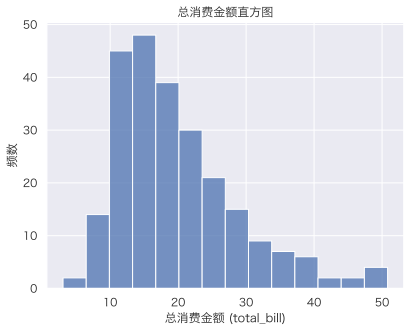

In [3]:
sns.histplot(data=tips, x='total_bill')
plt.title('总消费金额直方图')
plt.xlabel('总消费金额 (total_bill)')
plt.ylabel('频数')
plt.show()


**范例 2：添加核密度估计曲线 (KDE)**

在直方图的基础上，可以添加一条平滑的曲线来更好地观察分布形态。

**方法：** 设置参数 `kde=True`。

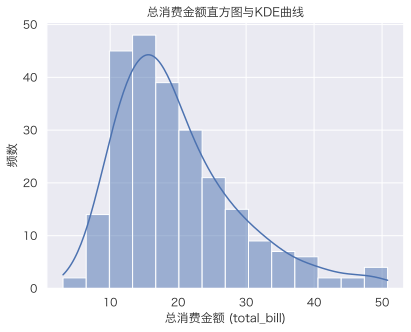

In [4]:
sns.histplot(data=tips, x='total_bill', kde=True)
plt.title('总消费金额直方图与KDE曲线')
plt.xlabel('总消费金额 (total_bill)')
plt.ylabel('频数')
plt.show()

**范例 3：二维直方图**

**需求：** 我们不仅关心单个变量，还想知道两个变量的联合分布。例如，总消费和小费主要集中在哪个区域？

**方法：** 同时为 `sns.histplot()` 提供 `x` 和 `y` 参数。颜色的深浅代表了该区域数据点的密集程度。

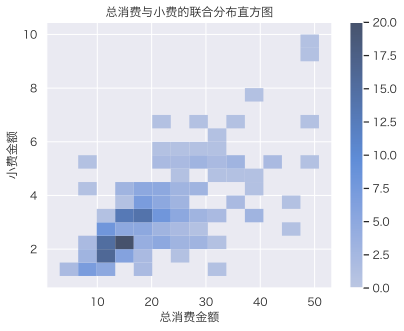

In [5]:
sns.histplot(data=tips, x='total_bill', y='tip', cbar=True)
plt.title('总消费与小费的联合分布直方图')
plt.xlabel('总消费金额')
plt.ylabel('小费金额')
plt.show()

**范例 4：重叠直方图**

**需求：** 比较吸烟者与非吸烟者在总消费金额 (`total_bill`) 上的分布差异。

**方法：** 在同个 `histplot` 调用中使用 `hue` 参数。Seaborn 会自动为不同组别应用不同颜色并创建图例。`multiple="layer"` 使其重叠，`kde=True` 可以更清晰地对比分布趋势。


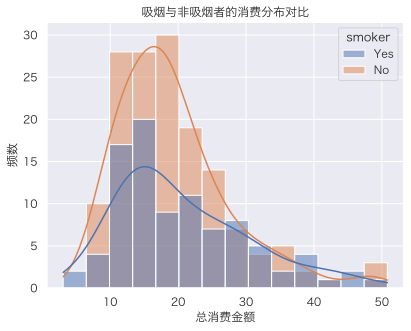

In [6]:
sns.histplot(data=tips, x='total_bill', hue='smoker', multiple="layer", kde=True)
plt.title('吸烟与非吸烟者的消费分布对比')
plt.xlabel('总消费金额')
plt.ylabel('频数')
plt.show()

**范例 5：复杂示例(山脊图)**

**需求：** 比较一周中每一天消费金额的详细分布形态。山脊图（Ridgeline Plot）可以优雅地展示多组数据的分布，常用于科学出版物。

**方法：** 使用 `FacetGrid` 结合 `kdeplot`，并通过一些技巧实现图形的重叠。

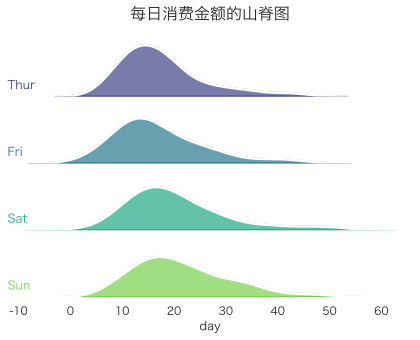

In [ ]:
# 1. 设置主题和调色板
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# 设置字体。如果不设置，中文可能会乱码。这里采用冬青黑、微软雅黑和文泉驿微米黑，可以兼容大多数操作系统。
plt.rcParams["font.sans-serif"]=["Hiragino Sans GB", "Microsoft YaHei", "WenQuanYi Micro Hei"] 
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
palette = sns.color_palette("viridis", 4)

# 2. 创建 FacetGrid，为每一天（day）创建一个子图
g = sns.FacetGrid(tips, row="day", hue="day", aspect=5, height=1.2, palette=palette, row_order=['Thur', 'Fri', 'Sat', 'Sun'])

# 3. 在每个子图上绘制带有填充的核密度图
g.map(sns.kdeplot, "total_bill", fill=True, alpha=0.7, lw=2)
g.map(sns.kdeplot, "total_bill", color="white", lw=2.5)

# 4. 在每个子图上添加文字标签（星期几）
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)
g.map(label, "day")

# 5. 实现子图重叠效果
g.fig.subplots_adjust(hspace=-0.5)

# 6. 清理坐标轴，移除不必要的元素
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.suptitle('每日消费金额的山脊图', y=0.98, fontsize=16)
g.tight_layout()
plt.show()

# 把绘图风格复原为默认主题，且修复字体问题
sns.set_theme()
plt.rcParams["font.sans-serif"]=["Hiragino Sans GB", "Microsoft YaHei", "WenQuanYi Micro Hei"] 
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


### 计数图 (Count Plot)

**数据：** `tips` 数据集 (假设已在环境中加载)

**需求：** 统计在一周内，每天的就餐记录数量，即查看类别变量的频次。

**方法：** 使用 `sns.countplot()`。它本质上是针对类别变量的直方图，专门用于计数。

**范例 1：垂直计数图 (带数值标签)**

最常见的用法，x轴为类别，y轴为该类别的数量。我们通过 `ax.patches` 遍历每个柱体并添加文本。

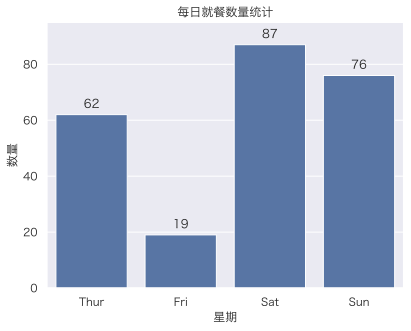

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 tips 数据集已加载
# tips = sns.load_dataset('tips')
#sns.set_theme(style="whitegrid") 

# 将绘图结果赋值给 ax，以便后续操作
ax = sns.countplot(data=tips, x='day', order=['Thur', 'Fri', 'Sat', 'Sun'])
ax.set_title('每日就餐数量统计')
ax.set_xlabel('星期')
ax.set_ylabel('数量')

# 核心：在每个柱子顶部添加数字
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # 获取柱子的高度作为标签
                (p.get_x() + p.get_width() / 2., p.get_height()),  # 确定文本的位置 (x, y)
                ha='center', va='center',  # 水平和垂直对齐方式
                xytext=(0, 10),  # 文本偏移量
                textcoords='offset points')
    
ax.set_ylim(0,95) # 设置y轴范围，确保数字标签不会被截断
plt.show()

**范例 2：水平计数图**

当类别标签很长时，将图形水平放置更易于阅读。

**方法：** 将变量传给 `y` 参数。

(0.0, 95.0)

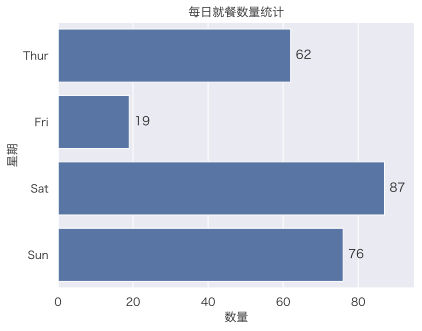

In [9]:
ax = sns.countplot(data=tips, y='day', order=['Thur', 'Fri', 'Sat', 'Sun'])
ax.set_title('每日就餐数量统计')
ax.set_xlabel('数量')
ax.set_ylabel('星期')

# 核心：在每个柱子右侧添加数字
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',  # 获取柱子的宽度作为标签
                (p.get_width(), p.get_y() + p.get_height() / 2.),  # 确定文本的位置 (x, y)
                ha='left', va='center',  # 水平和垂直对齐方式
                xytext=(5, 0),  # 文本偏移量
                textcoords='offset points')
ax.set_xlim(0, 95)  # 设置x轴范围，确保数字标签不会被截断

## 关系图与比较图

这类图形用于探索两个或多个变量之间的关系。

### 柱状图 (Bar Plot)

**数据：** `tips` 数据集 (已加载)

**需求：** `countplot` 只能展示频数。如果我们想知道每天的**平均**消费总额是多少，就需要用到 `barplot`。

**方法：** 使用 `sns.barplot()`。它会计算一个数值变量在一个类别变量不同水平上的集中趋势（默认为均值）。

**范例 1：基础柱状图**

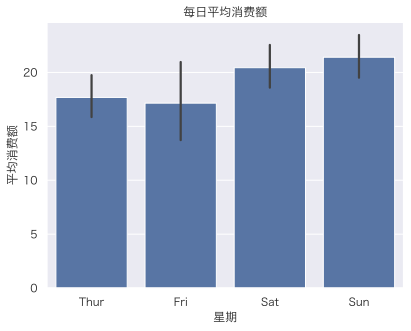

In [10]:
sns.barplot(data=tips, x='day', y='total_bill', order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.title('每日平均消费额')
plt.xlabel('星期')
plt.ylabel('平均消费额')
plt.show()


**范例 2：分组柱状图**

**需求：** 在每日平均消费的基础上，进一步区分午餐和晚餐。

**方法：** 使用 `hue` 参数进行分组。

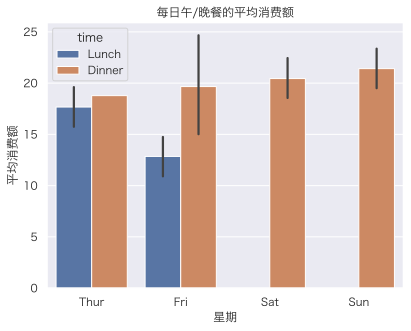

In [11]:
sns.barplot(data=tips, x='day', y='total_bill', hue='time', order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.title('每日午/晚餐的平均消费额')
plt.xlabel('星期')
plt.ylabel('平均消费额')
plt.show()

### 折线图 (Line Plot)

**数据与准备**

**数据集：** `flights`

该数据集记录了1949年至1960年每月国际航班的乘客数量。关键变量包括 `year` (年份), `month` (月份), 和 `passengers` (乘客数)。

In [12]:
# --- 加载并查看数据 ---
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121



**绘图**

**需求：** 展示航空公司乘客数量随时间变化的趋势。

**方法：** 使用 `sns.lineplot()`。它非常适合展示一个数值变量随另一个连续变量（尤其是时间）变化的趋势。

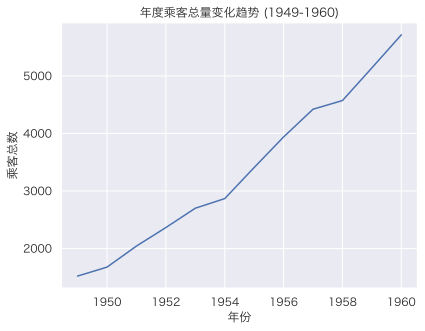

In [13]:
# 由于数据是月度的，为了看年度趋势，先按年份聚合
flights_yearly = flights.groupby('year')['passengers'].sum().reset_index()

sns.lineplot(data=flights_yearly, x='year', y='passengers')
plt.title('年度乘客总量变化趋势 (1949-1960)')
plt.xlabel('年份')
plt.ylabel('乘客总数')
plt.show()

**范例 2：多线对比折线图 (探索季节性模式)**

**需求：** 总体趋势在增长，但这种增长是否存在季节性规律？例如，一年中哪些月份是旺季，哪些是淡季？

**方法：** 不再按年聚合，直接使用原始月度数据。将 `month` 作为 x 轴，`passengers` 作为 y 轴，并使用 `hue="year"` 参数为每一年绘制一条单独的彩色折线。


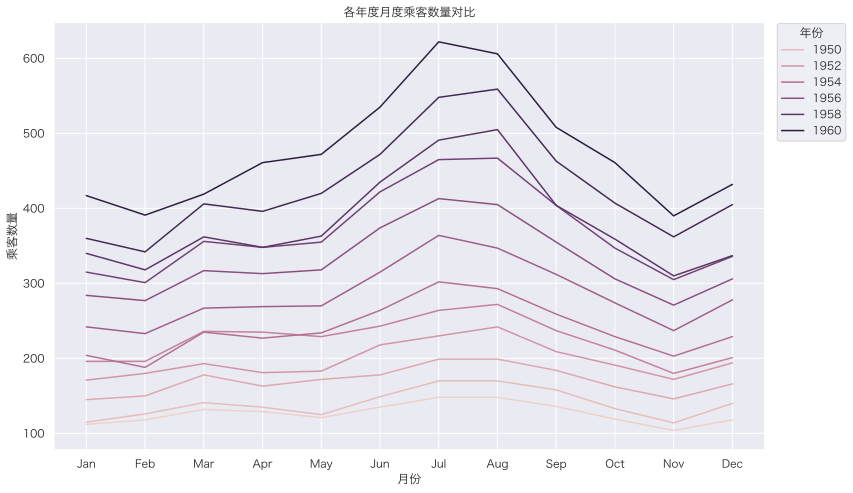

In [14]:
plt.figure(figsize=(12, 7))

# 将月份转为有序类别，确保X轴顺序正确
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
flights['month'] = pd.Categorical(flights['month'], categories=month_order, ordered=True)

sns.lineplot(data=flights, x="month", y="passengers", hue="year")

plt.title('各年度月度乘客数量对比')
plt.xlabel('月份')
plt.ylabel('乘客数量')
plt.legend(title='年份', bbox_to_anchor=(1.01, 1.01), loc='upper left')
plt.tight_layout()
plt.show()


### 散点图 (Scatter Plot)

**数据：** `tips` 数据集

**需求：** 探索 `total_bill` (总消费) 与 `tip` (小费) 两个连续变量之间的关系。

**方法：** 使用 `sns.scatterplot()`。

**范例 1：基础散点图**

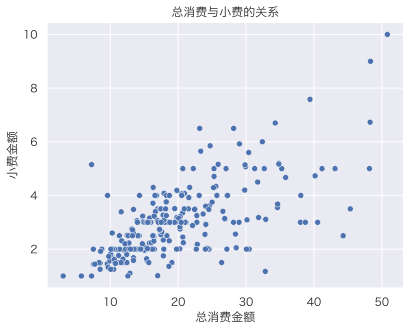

In [15]:
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.title('总消费与小费的关系')
plt.xlabel('总消费金额')
plt.ylabel('小费金额')
plt.show()

**范例 2：使用颜色分组**

**需求：** 在上述关系中，探究吸烟者和非吸烟者的模式是否有差异。

**方法：** 使用 `hue` 参数。


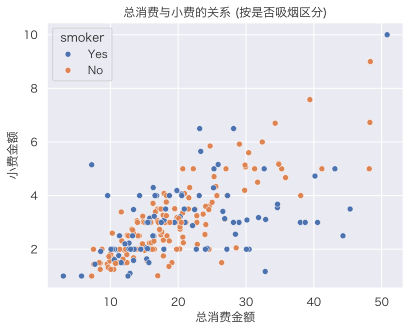

In [16]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker')
plt.title('总消费与小费的关系 (按是否吸烟区分)')
plt.xlabel('总消费金额')
plt.ylabel('小费金额')
plt.show()

**范例 3：使用大小和样式添加更多维度**

**需求：** 同时根据就餐人数 (`size`) 和就餐时间 (`time`) 对数据点进行区分。

**方法：** 使用 `size` 和 `style` 参数。

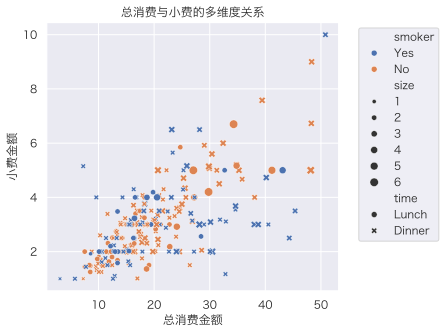

In [17]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker', style='time', size='size')
plt.title('总消费与小费的多维度关系')
plt.xlabel('总消费金额')
plt.ylabel('小费金额')
# 将图例移到图外侧
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 箱形图 (Box Plot)

**数据：** `tips` 数据集

**需求：** 比较一周中每天的消费总额 (`total_bill`) 的分布情况，包括中位数、波动范围和异常值。

**方法：** 使用 `sns.boxplot()`。

**范例 1：基础箱形图**


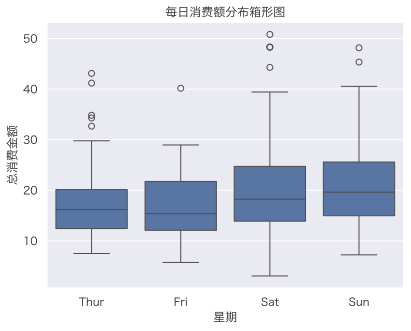

In [18]:
sns.boxplot(data=tips, x='day', y='total_bill', order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.title('每日消费额分布箱形图')
plt.xlabel('星期')
plt.ylabel('总消费金额')
plt.show()

**范例 2：分组箱形图**

**需求：** 在每天的基础上，进一步按午餐和晚餐 (`time`) 进行分组比较。

**方法：** 使用 `hue` 参数。

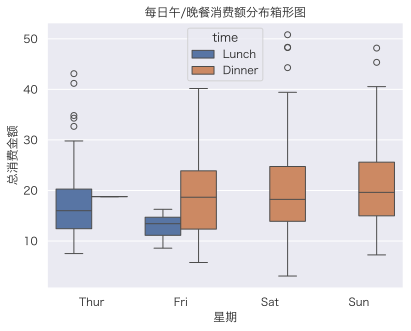

In [19]:
sns.boxplot(data=tips, x='day', y='total_bill', hue='time', order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.title('每日午/晚餐消费额分布箱形图')
plt.xlabel('星期')
plt.ylabel('总消费金额')
plt.show()

## 矩阵图与分面图

这类图允许我们同时在多个子图上展示数据的不同子集，或将数据矩阵化进行可视化。

### 热力图 (Heatmap)

**数据：** `flights` 数据集

**需求：** 直观地展示每年中各月份的乘客数量，快速发现旺季和淡季。

**方法：** 使用 `sns.heatmap()`。这需要先将数据整理成一个二维矩阵（透视表）。

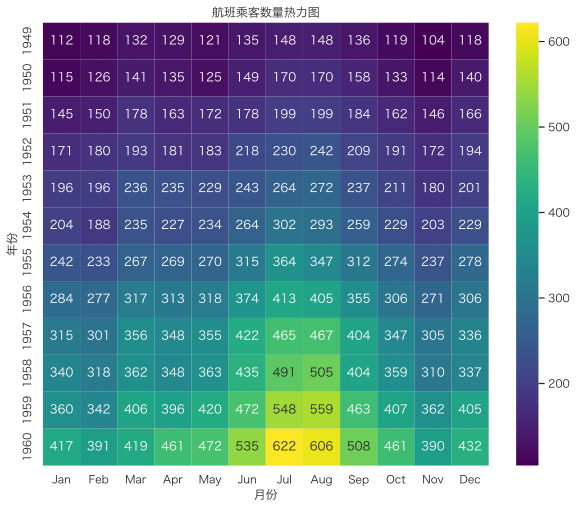

In [20]:
# 1. 创建数据透视表
flights_pivot = flights.pivot(index='year', columns='month', values='passengers')

# 2. 绘制热力图
plt.figure(figsize=(10, 8)) # 调整图形大小以便容纳所有内容
sns.heatmap(data=flights_pivot, cmap='viridis', annot=True, fmt='d')
plt.title('航班乘客数量热力图')
plt.xlabel('月份')
plt.ylabel('年份')
plt.show()

### 分面网格 (Facet Grid)

**数据：** `tips` 数据集

**需求：** 我们想系统地、并排地观察 `sex` (性别) 和 `time` (就餐时间) 这两个因素是如何共同作用于 `total_bill` (总消费) 与 `tip` (小费) 关系的。

**方法：** 使用高阶函数 `sns.relplot()` (用于关系图) 或 `sns.catplot()` (用于分类图)。它们将绘图与数据子集划分功能结合在一起。

**范例：分面散点图**

`relplot` 可以通过 `col` 和 `row` 参数将数据划分到不同的子图矩阵中。


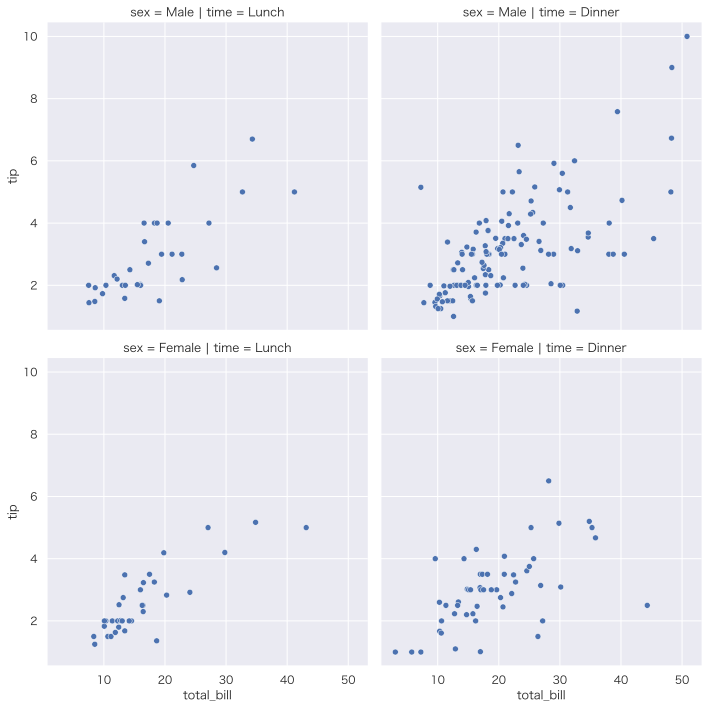

In [21]:
sns.relplot(
    data=tips, 
    x='total_bill', 
    y='tip', 
    col='time',  # 按 'time' 变量分列
    row='sex',    # 按 'sex' 变量分行
)
# relplot 会自动生成标题和坐标轴标签
plt.show()

### 分面网格 (Facet Grid) - 高级设置范例

当使用 `sns.relplot` 或 `sns.catplot` 创建分面图后，我们可以通过其返回的 `FacetGrid` 对象 (`g`) 对图形进行精细的定制。

**需求：** 我们想系统地、并排地观察 `sex` (性别) 和 `time` (就餐时间) 这两个因素是如何共同作用于 `total_bill` (总消费) 与 `tip` (小费) 关系的，并为图表添加专业的尺寸和标题。


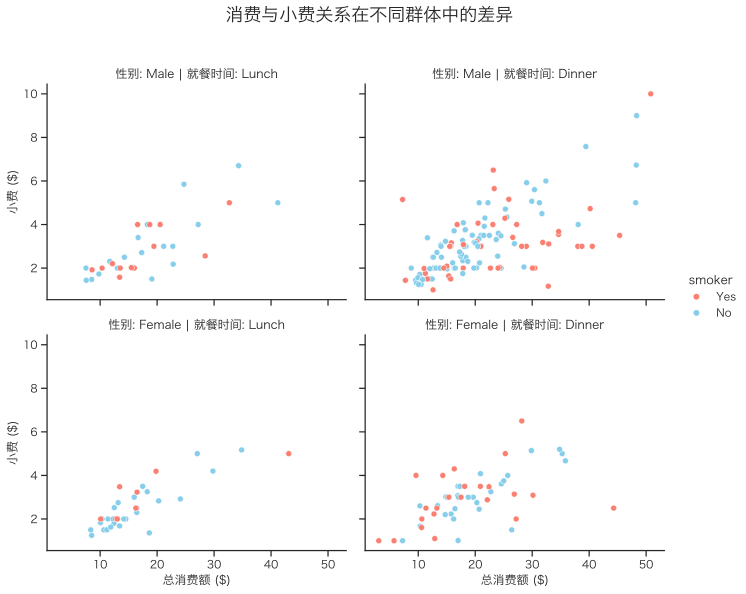

In [ ]:


# 加载数据
tips = sns.load_dataset('tips')
sns.set_theme(style="ticks")
# 设置字体。如果不设置，中文可能会乱码。这里采用冬青黑、微软雅黑和文泉驿微米黑，可以兼容大多数操作系统。
plt.rcParams["font.sans-serif"]=["Hiragino Sans GB", "Microsoft YaHei", "WenQuanYi Micro Hei"] 

plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 1. 绘制基础分面图，并设置尺寸
# height: 每个子图的高度（英寸）
# aspect: 每个子图的宽高比 (width = height * aspect)
g = sns.relplot(
    data=tips, 
    x='total_bill', 
    y='tip', 
    col='time',
    row='sex',
    hue='smoker',
    palette={'Yes': 'salmon', 'No': 'skyblue'},
    height=4, 
    aspect=1.2 
)

# 2. 设置子图标题
# {row_name} 和 {col_name} 是占位符，会自动替换为变量的值
g.set_titles(row_template="性别: {row_name}", col_template="就餐时间: {col_name}")

# 3. 设置坐标轴标签 (会应用到所有子图)
g.set_axis_labels("总消费额 ($)", "小费 ($)")

# 4. 添加整体大标题
# y 参数调整大标题的垂直位置，防止与子图标题重叠
g.fig.suptitle("消费与小费关系在不同群体中的差异", fontsize=18, fontweight='bold', y=1.03)

# 5. 调整布局以适应标题
g.tight_layout()

plt.show()

## 图表通用设置详解

在掌握了各类图形的基本绘制后，本节将作为一个综合性范例，展示如何将一张默认图表，通过精细的定制化操作，改造成符合报告或出版物要求的专业图表。我们将以一个双折线图为例，系统讲解标题、坐标轴、图例、注释等通用设置方法。


`fmri` 数据集来源于一项功能性磁共振成像（fMRI）实验，它记录了被试在接受不同事件刺激时，大脑特定区域的信号变化。数据集中的关键变量包括：`subject`（被试者ID），`timepoint`（刺激后的时间点），`event`（事件类型，分为'stim'刺激和'cue'提示），`region`（大脑区域，分为'frontal'额叶和'parietal'顶叶），以及 `signal`（BOLD信号强度，它是一种间接反映脑部活动水平的指标）。该数据常用于探索不同条件下，神经信号随时间变化的模式。

In [ ]:

# 导入库
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# 设置字体。如果不设置，中文可能会乱码。这里采用冬青黑、微软雅黑和文泉驿微米黑，可以兼容大多数操作系统。
plt.rcParams["font.sans-serif"]=["Hiragino Sans GB", "Microsoft YaHei", "WenQuanYi Micro Hei"] 

plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# --- 1. 加载并准备新数据集：fmri ---
# 该数据集记录了不同被试在“刺激(stim)”与“提示(cue)”两种事件条件下，
# 大脑特定区域BOLD信号随时间的变化。
fmri = sns.load_dataset("fmri")
fmri.head()


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


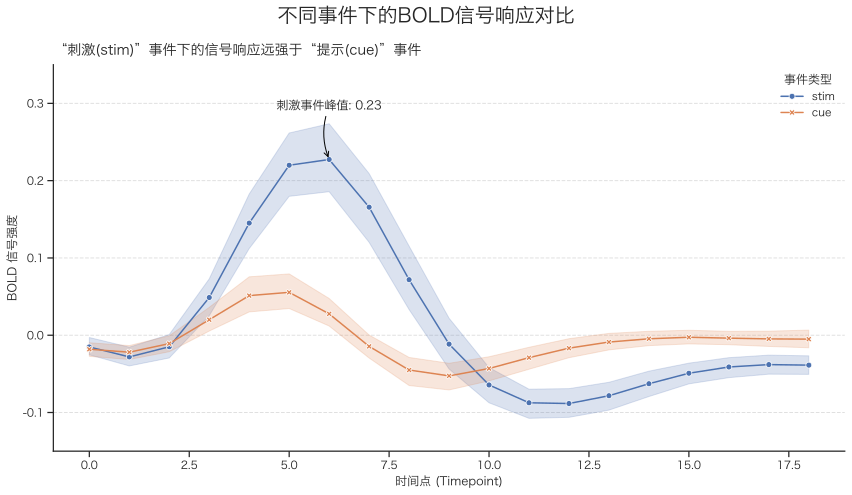

In [24]:
# --- 2. 准备工作：创建 Figure 和 Axes 对象 ---
# 我们使用 plt.subplots() 来创建画布(Figure)和子图(Axes)。
# 这样做能让我们对图形的每一个元素有更精确的控制。
# figsize=(width, height) 参数以英寸为单位设置图形的大小。
fig, ax = plt.subplots(figsize=(12, 7))

# --- 3. 在指定的 ax 上绘制基础图形 ---
# 使用 lineplot 绘制两种事件条件下，BOLD信号随时间变化的对比图。
sns.lineplot(
    data=fmri, 
    x='timepoint', 
    y='signal', 
    hue='event', 
    style='event', # 使用不同线型增加区分度
    markers=True,    # 添加标记点
    dashes=False,    # 确保style使用不同标记而非虚线
    ax=ax
)


# --- 4. 开始通用设置与美化 ---

# 4.1 设置标题
# fig.suptitle() 用于设置整个图形的主标题，位置更高，字体通常更大。
fig.suptitle('不同事件下的BOLD信号响应对比', fontsize=20, fontweight='bold')
# ax.set_title() 用于设置该子图的标题，可作为副标题使用。
ax.set_title('“刺激(stim)”事件下的信号响应远强于“提示(cue)”事件', fontsize=14, loc='left', pad=10)

# 4.2 设置坐标轴标签和范围
ax.set_xlabel('时间点 (Timepoint)', fontsize=12)
ax.set_ylabel('BOLD 信号强度', fontsize=12)
# 手动设置Y轴范围，让信号的微小变化更清晰。
ax.set_ylim(-0.15, 0.35) 

# 4.3 自定义图例
# ax.legend() 用于定制图例的各个方面。
legend = ax.get_legend() # 获取图例对象
legend.set_title('事件类型')      # 设置图例的标题
legend.set_frame_on(False)       # 去除图例的边框
# 将图例放置在图表内部的左上角
plt.setp(legend.get_title(), fontsize='12')

# 4.4 美化图表边框（spines）和网格
# 移除顶部和右侧的边框线，是常见的数据新闻图表美化风格。
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 添加水平网格线，有助于数值的读取，但设为虚线且半透明，不喧宾夺主。
ax.grid(axis='y', linestyle='--', alpha=0.6)

# 4.5 添加数据注释 (Annotation)
# 直接在图上标注关键信息，能极大地提升图表的可读性。
# --- 代码修正 ---
# 找到 'stim' 事件下，平均信号的最高点
# 1. 按时间点分组，计算平均信号，这与 lineplot 的计算方式一致
mean_stim_signal = fmri.query("event == 'stim'").groupby('timepoint')['signal'].mean()

# 2. 找到峰值及其对应的时间点
peak_signal_value = mean_stim_signal.max()
peak_timepoint = mean_stim_signal.idxmax()

# 3. 使用正确的数据进行注释
ax.annotate(
    f'刺激事件峰值: {peak_signal_value:.2f}', 
    xy=(peak_timepoint, peak_signal_value), # 箭头指向正确的位置 (峰值均线上的点)
    xytext=(0, 50),                 # 文本的偏移位置
    textcoords='offset points',     # 定义偏移类型
    ha='center',                    # 水平居中对齐
    arrowprops=dict(arrowstyle="->", color='black', connectionstyle="arc3,rad=.2") # 设置箭头样式
)

# 4.6 调整整体布局
# 防止标题等元素因尺寸调整而发生重叠。
plt.tight_layout() 

plt.show()


## 多子图（Axes）组合与定制

除了使用 `seaborn` 的 `FacetGrid` (如 `relplot`) 自动创建分面图外，我们还可以使用 `matplotlib` 的 `plt.subplots()` 功能来手动创建子图网格。这种方法提供了最大的灵活性，允许我们在同一个画布上组合完全不同类型的图表，并对每一个子图进行独立的精细化设置。

**需求：** 创建一个 2x2 的图表面板，用于从不同维度全面分析 `tips` 数据集，并对每个子图进行定制。


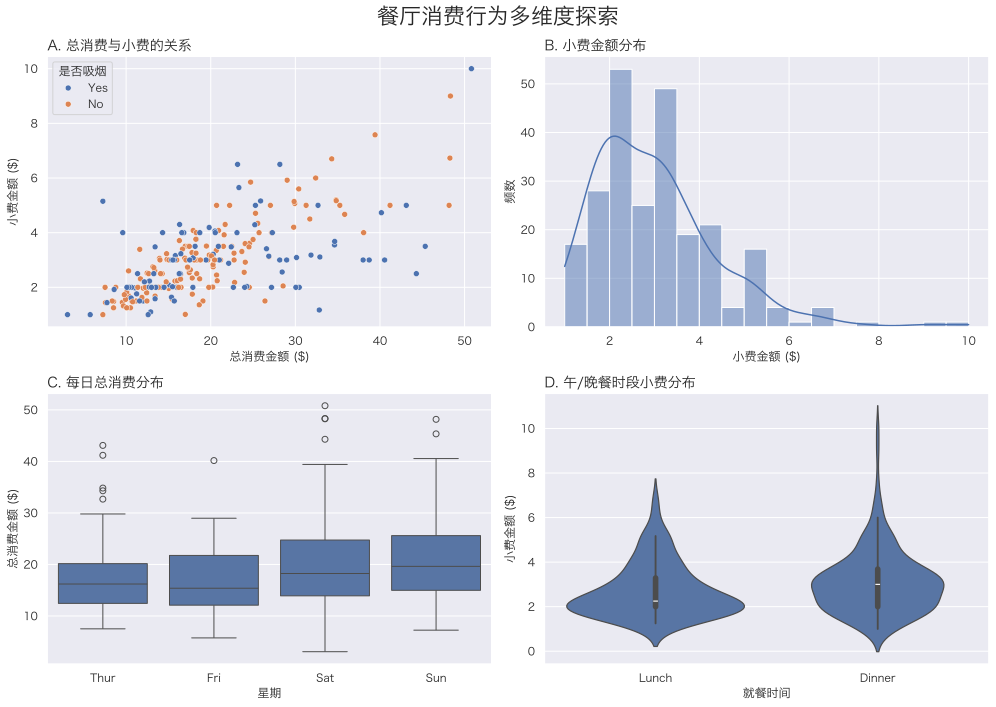

In [25]:


# 加载数据
tips = sns.load_dataset('tips')
sns.set_theme()
plt.rcParams["font.sans-serif"]=["Hiragino Sans GB", "Microsoft YaHei", "WenQuanYi Micro Hei"] 

plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
# 1. 创建一个 2x2 的子图网格
# figsize 控制整个画布的大小。
# sharex/sharey: 在这个例子中，由于每个子图的X轴和Y轴代表的含义不同，
# 我们将它们都设为 False（默认值）。如果子图的轴有可比性（如都代表时间），
# 可以设为 True 或 'col'/'row' 来共享坐标轴，以节省空间。
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# 2. 在每个子图上分别绘图并进行定制

# --- 子图 (0, 0): 左上角 ---
# 绘制总消费与小费的散点图
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker', ax=axes[0, 0])
axes[0, 0].set_title('A. 总消费与小费的关系', loc='left', fontsize=14)
axes[0, 0].set_xlabel('总消费金额 ($)')
axes[0, 0].set_ylabel('小费金额 ($)')
axes[0, 0].legend(title='是否吸烟')

# --- 子图 (0, 1): 右上角 ---
# 绘制小费金额的直方图和KDE
sns.histplot(data=tips, x='tip', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('B. 小费金额分布', loc='left', fontsize=14)
axes[0, 1].set_xlabel('小费金额 ($)')
axes[0, 1].set_ylabel('频数')

# --- 子图 (1, 0): 左下角 ---
# 绘制按天分组的总消费箱形图
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[1, 0], order=['Thur', 'Fri', 'Sat', 'Sun'])
axes[1, 0].set_title('C. 每日总消费分布', loc='left', fontsize=14)
axes[1, 0].set_xlabel('星期')
axes[1, 0].set_ylabel('总消费金额 ($)')

# --- 子图 (1, 1): 右下角 ---
# 绘制按就餐时间分组的小费小提琴图
sns.violinplot(data=tips, x='time', y='tip', ax=axes[1, 1])
axes[1, 1].set_title('D. 午/晚餐时段小费分布', loc='left', fontsize=14)
axes[1, 1].set_xlabel('就餐时间')
axes[1, 1].set_ylabel('小费金额 ($)')


# 3. 添加一个贯穿整个图形的大标题
fig.suptitle('餐厅消费行为多维度探索', fontsize=22, fontweight='bold')

# 4. 自动调整子图间的间距，防止重叠
# rect 参数为大标题预留出空间
fig.tight_layout()

plt.show()